In [ ]:
# ..... plot pseudobulk expr across 3 species ..... #

In [2]:
library(dplyr)
library(ggplot2)
library(MetaNeighbor)

In [3]:
# load data
load('chicken/chicken_full_integrated_pseudobulk_expression_matrix.Rdata')
mat1 = dfnew
load('turtle/turtle_full_integrated_pseudobulk_expression_matrix.Rdata')
mat2 = dfnew
load('lizard/lizard_full_integrated_pseudobulk_expression_matrix.Rdata')
mat3 = dfnew

In [4]:
subs3 = c('vCM', 'aCM', 'immature-CM', 'blood', 'macrophage', 'endothelial', 'endocardial',
          'epicardial', 'fibroblast', 'SMC', 'pericyte', 'neural-crest')
subcol3 = c('#ff6361', '#fd91a0', '#ffbab5', '#d68a58', '#eddfc9', '#011a4d', '#255d8d',
            '#499fcd', '#c2d87a', '#fece52', '#feb94a', '#829aed')

ctype_order = c('vCM', 'aCM', 'immature-CM', 'endothelial', 'endocardial', 'epicardial',
                'fibroblast', 'SMC', 'pericyte', 'neural-crest', 'blood', 'macrophage')
cols1 = rep(subcol3[match(ctype_order, subs3)], 3)
cols2 = c('#ffe1a8', '#8fc0a9', '#f27a7d')

In [7]:
g1 = 'ACTC1'
g2 = g1
g3 = g1
df = data.frame(species = rep(c('chicken', 'turtle', 'lizard'), each = dim(mat1)[2]), 
                celltype = rep(ctype_order, 3), gene = g1,
                stage = rep(rep(c('s1', 's2', 's3'), each = 12), 3),
                exp = c(unlist(mat1[g1,]), unlist(mat2[g1,]), unlist(mat3[g1,])))
df$celltype = factor(df$celltype, levels = ctype_order)
df$species = factor(df$species, levels = c('chicken', 'turtle', 'lizard'))

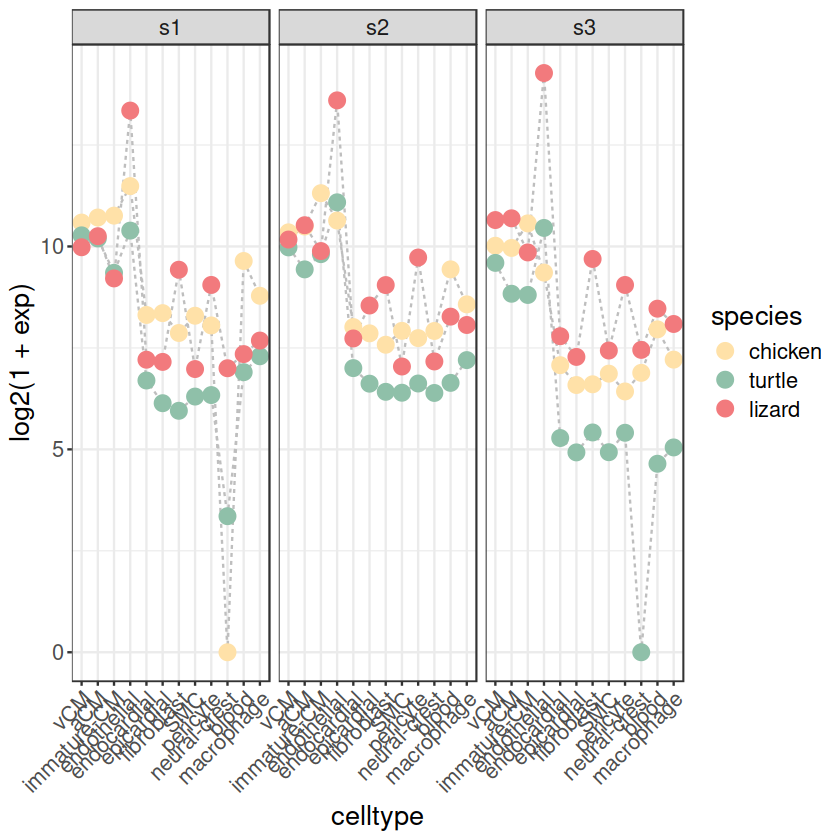

In [8]:
# pdf('aa-neurog2-pdgfra-dev.pdf', width = 12, height = 7)
# png(paste0('aa-', g1, '-crx-exp.png'), width = 13, height = 4, res = 300, units = 'in')
ggplot(df, aes(x = celltype, y = log2(1+exp), color = species, group = species)) + 
geom_line(linetype = 'dashed', color = '#bebebe') + geom_point(size = 4) + 
scale_color_manual(values = cols2) + facet_wrap(~stage, nrow = 1) + 
theme_bw() + theme(text = element_text(size = 16), axis.text.x = element_text(angle = 45, hjust = 1)) #+
# theme(legend.position = 'none')
# dev.off()

In [9]:
# get cell-type corr
c1 = cor(mat1, mat1, method = 'spearman')
c1[1:3,1:4]

s1|vCM    s1|aCM    s1|immature-CM s1|endothelial
s1|vCM         1.0000000 0.9860984 0.9499472      0.8602424     
s1|aCM         0.9860984 1.0000000 0.9514578      0.8635965     
s1|immature-CM 0.9499472 0.9514578 1.0000000      0.8610751

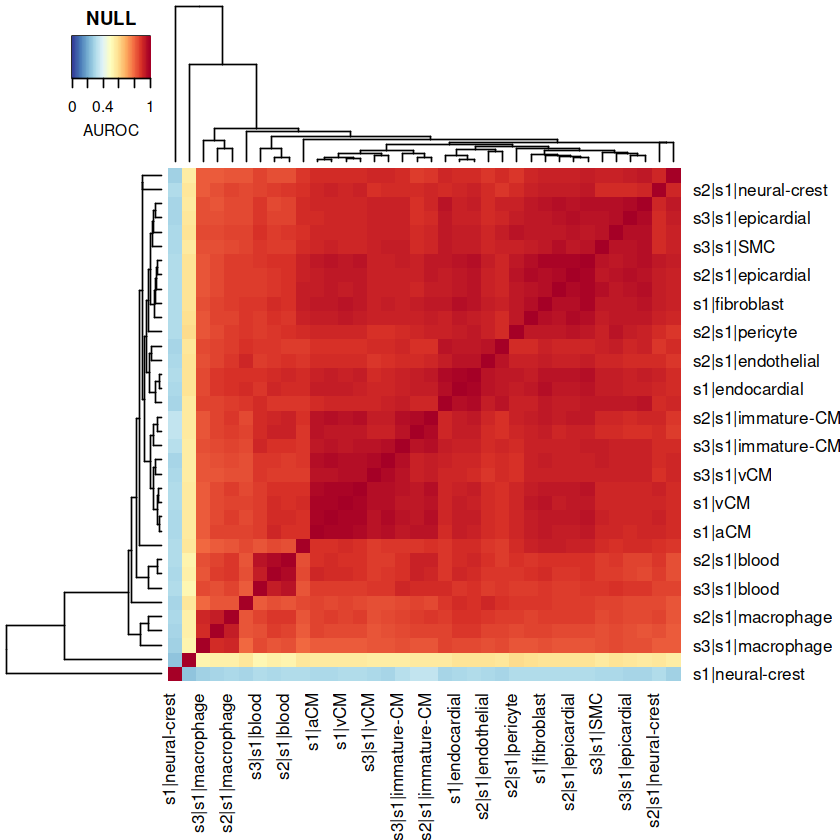

In [10]:
plotHeatmap(c1)